In [1]:
import pandas as pd
import scanpy as sc
import glob
import numpy as np
import seaborn as sns; 
import matplotlib.pyplot as plt
import scipy as sp

# Read critical gene tables

In [2]:
def get_ct(data): 
    if(data=="GSE110894"):
        return("Sample name")
    elif(data=="GSE117872_HN120"):
        return("cell_color")
    elif(data=="GSE117872_HN137"):
        return("cell_color")
    else:
        return("leiden")
    
DATA = "GSE117872_HN120"
PCT_EXP = 25
ORDER = 'log_fc'

In [3]:
# Change it to your path that sabe h5ad for HN120 critical gene gradient
f_cg = glob.glob("data/*"+DATA+"sc_gradient.txt")
df_cg = pd.read_csv(f_cg[0],sep=" ",header=None)

IndexError: list index out of range

In [ ]:
df_cg.head()

# Read critical gene names

In [ ]:
# Change it to your path that sabe h5ad for HN120 critical gene name
f_gn = glob.glob("data/*"+DATA+"sc_gene.csv")
df_gene = pd.read_csv(f_gn[0],index_col=0)

In [ ]:
df_gene.head()

In [ ]:
df_cg.columns = df_gene.iloc[:,0].values

# Read result h5ad files

In [ ]:
# Change it to your path that sabe h5ad for HN120 cell
adata_fname = glob.glob("D://ws//monocle//review//*"+DATA+"*h5ad")

In [ ]:
adata = sc.read_h5ad(adata_fname[0])

In [ ]:
adata.obs.head()

In [ ]:
df_cg.index = adata.obs.index

I select no cliping here because keeping negative value can still calculate the logfc

In [ ]:
clip = 'no'
if clip == 'positive':
    df_cg = np.clip(df_cg,a_min=0,a_max=None)
elif clip == 'negative':
    df_cg = abs(np.clip(df_cg,a_min=None,a_max=0))
else:
    df_cg = abs(df_cg)

In [ ]:
bdata= sc.AnnData(df_cg)

In [ ]:
bdata.obs=adata.obs

In [ ]:
df_cg.head()

In [ ]:
adata.obs

In [ ]:
igadata= sc.AnnData(df_cg)
igadata.var.index = adata.var.index
igadata.obs.index = adata.obs.index

igadata.obs['sens_label'] = adata.obs['sens_label'].astype('category')

In [ ]:
sc.pp.normalize_total(igadata)
sc.pp.log1p(adata)


In [ ]:
rg_result = sc.tl.rank_genes_groups(igadata, 'sens_label',pts=True)

In [20]:
igadata.uns['rank_genes_groups']

{'params': {'groupby': 'sens_label',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'pts':                            0         1
 gene_id                               
 ENSMUSG00000110331  0.882779  0.815934
 ENSMUSG00000006281  0.191027  0.118132
 ENSMUSG00000029007  0.452967  0.370879
 ENSMUSG00000032026  0.832127  0.799451
 ENSMUSG00000031808  0.172214  0.157967
 ...                      ...       ...
 ENSMUSG00000005800  0.007236  0.008242
 ENSMUSG00000040809  0.000000  0.004121
 ENSMUSG00000113035  0.008683  0.012363
 ENSMUSG00000102390  0.001447  0.002747
 ENSMUSG00000045662  0.004342  0.001374
 
 [6644 rows x 2 columns],
 'pts_rest':                            0         1
 gene_id                               
 ENSMUSG00000110331  0.815934  0.882779
 ENSMUSG00000006281  0.118132  0.191027
 ENSMUSG00000029007  0.370879  0.452967
 ENSMUSG00000032026  0.799451  0.832127
 ENSMUSG00000031808  0.157967  0.17

In [21]:
resist_g = pd.DataFrame(igadata.uns['rank_genes_groups']['names']).iloc[:,0]
sens_g = pd.DataFrame(igadata.uns['rank_genes_groups']['names']).iloc[:,1]
resist_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,0]
sens_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,1]
resist_z = pd.DataFrame(igadata.uns['rank_genes_groups']['scores']).iloc[:,0]
sens_z = pd.DataFrame(igadata.uns['rank_genes_groups']['scores']).iloc[:,1]
resist_p = pd.DataFrame(igadata.uns['rank_genes_groups']['pvals_adj']).iloc[:,0]
sens_p = pd.DataFrame(igadata.uns['rank_genes_groups']['pvals_adj']).iloc[:,1]

In [22]:
igadata.uns['rank_genes_groups']["pts"]

0         1
gene_id                               
ENSMUSG00000110331  0.882779  0.815934
ENSMUSG00000006281  0.191027  0.118132
ENSMUSG00000029007  0.452967  0.370879
ENSMUSG00000032026  0.832127  0.799451
ENSMUSG00000031808  0.172214  0.157967
...                      ...       ...
ENSMUSG00000005800  0.007236  0.008242
ENSMUSG00000040809  0.000000  0.004121
ENSMUSG00000113035  0.008683  0.012363
ENSMUSG00000102390  0.001447  0.002747
ENSMUSG00000045662  0.004342  0.001374

[6644 rows x 2 columns]

In [23]:
# resist_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,0]
# sens_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,0]

In [24]:
sensG_df = pd.DataFrame({"gene_name":sens_g,"log_fc":sens_fc,'zscore':sens_z,'p_adj':sens_p})
resistG_df = pd.DataFrame({"gene_name":resist_g,"log_fc":resist_fc,'zscore':resist_z,'p_adj':resist_p})

In [25]:
sensG_df = sensG_df.sort_values("log_fc",ascending=False)

In [26]:
resistG_df = resistG_df.sort_values("log_fc",ascending=False)

# Actually the DE test can be done once

Because DE bewteen two deg selected groups are just inverse order.

In [27]:
resistG_df

gene_name     log_fc    zscore     p_adj
2182  ENSMUSG00000044626  16.431038  1.270721  0.321819
788   ENSMUSG00000042284  16.323133  3.596984  0.001459
2329  ENSMUSG00000071226  16.287411  1.123847  0.386818
1001  ENSMUSG00000100417  15.879724  3.138906  0.006030
2375  ENSMUSG00000021373  15.504475  1.077220  0.408823
...                  ...        ...       ...       ...
5878  ENSMUSG00000051593 -15.732817 -3.633241  0.001287
6092  ENSMUSG00000043313 -16.862503 -4.376510  0.000082
5883  ENSMUSG00000075394 -16.912090 -3.642106  0.001248
6129  ENSMUSG00000104093 -17.663080 -4.527871  0.000044
6120  ENSMUSG00000038692 -17.716423 -4.489359  0.000051

[6644 rows x 4 columns]

In [28]:
sensG_df

gene_name     log_fc    zscore     p_adj
523   ENSMUSG00000038692  17.716423  4.489359  0.000051
514   ENSMUSG00000104093  17.663080  4.527871  0.000044
760   ENSMUSG00000075394  16.912090  3.642106  0.001248
551   ENSMUSG00000043313  16.862503  4.376510  0.000082
765   ENSMUSG00000051593  15.732817  3.633241  0.001287
...                  ...        ...       ...       ...
4268  ENSMUSG00000021373 -15.504475 -1.077220  0.408823
5642  ENSMUSG00000100417 -15.879724 -3.138906  0.006030
4314  ENSMUSG00000071226 -16.287411 -1.123847  0.386818
5855  ENSMUSG00000042284 -16.323133 -3.596984  0.001459
4461  ENSMUSG00000044626 -16.431038 -1.270721  0.321819

[6644 rows x 4 columns]

In [29]:
percentage = igadata.uns['rank_genes_groups']["pts"][igadata.uns['rank_genes_groups']["pts"].max(axis=1)>(PCT_EXP/100)]

In [30]:
percentage

0         1
gene_id                               
ENSMUSG00000110331  0.882779  0.815934
ENSMUSG00000029007  0.452967  0.370879
ENSMUSG00000032026  0.832127  0.799451
ENSMUSG00000024007  0.700434  0.642857
ENSMUSG00000028423  0.748191  0.641484
...                      ...       ...
ENSMUSG00000072964  0.027496  0.288462
ENSMUSG00000061118  0.206946  0.278846
ENSMUSG00000109418  0.023155  0.255495
ENSMUSG00000068854  0.096961  0.278846
ENSMUSG00000025037  0.013025  0.270604

[4209 rows x 2 columns]

In [31]:
sensG_df.to_csv("results/all"+DATA+str(PCT_EXP)+str(ORDER)+".csv")

In [32]:
df_Scg = sensG_df.merge(percentage,left_on="gene_name",right_index=True,how="right").sort_values("log_fc",ascending=False)
df_Scg.columns = ['gene_name', 'log_fc', 'zscore','p_adj', 'pct_exp_rest', 'pct_exp_ct_sens']

In [33]:
df_Scg

gene_name    log_fc     zscore          p_adj  pct_exp_rest  \
24    ENSMUSG00000029163  5.200839  18.153048   3.980139e-59      0.024602   
59    ENSMUSG00000010607  5.053658  13.032450   2.914862e-33      0.435601   
47    ENSMUSG00000025037  5.051255  14.610629   6.060071e-41      0.013025   
29    ENSMUSG00000034353  4.958126  17.512070   9.057187e-56      0.026049   
58    ENSMUSG00000079157  4.856708  13.051756   2.223609e-33      0.031838   
...                  ...       ...        ...            ...           ...   
6627  ENSMUSG00000098557 -4.094468 -16.457712   6.339481e-50      0.370478   
6632  ENSMUSG00000034040 -4.124121 -18.156080   1.281476e-59      0.523878   
6641  ENSMUSG00000027247 -4.941399 -24.778299   6.300396e-96      0.587554   
6643  ENSMUSG00000028822 -4.967688 -34.381969  1.029004e-154      0.895803   
6617  ENSMUSG00000046058 -5.207195 -14.621176   9.753903e-41      0.374819   

      pct_exp_ct_sens  
24           0.377747  
59           0.326923  
47           0.270604  
29           0.365385  
58           0.421703  
...               ...  
6627         0.126374  
6632         0.030220  
6641         0.468407  
6643         0.858516  
6617         0.008242  

[4209 rows x 6 columns]

In [34]:
df_Rcg = resistG_df.merge(percentage,left_on="gene_name",right_index=True,how="right").sort_values("log_fc",ascending=False)
df_Rcg.columns = ['gene_name', 'log_fc', 'zscore','p_adj', 'pct_exp_rest', 'pct_exp_ct_sens']

# Visualize expresison on critical gene

In [35]:
adata.obs.sens_label = adata.obs.sens_label.cat.rename_categories({1:"response", 0:"resist"})

In [36]:
adata.obs.sens_label

RPI1_A3     resist
RPI1_A4     resist
RPI1_A5     resist
RPI1_A6     resist
RPI1_A7     resist
             ...  
RPI7_P18    resist
RPI7_P19    resist
RPI7_P20    resist
RPI7_P21    resist
RPI7_P22    resist
Name: sens_label, Length: 1419, dtype: category
Categories (2, object): ['resist', 'response']

In [37]:
list(df_Rcg.gene_name.head(5))+["sens_label",get_ct(DATA)]

['ENSMUSG00000046058',
 'ENSMUSG00000028822',
 'ENSMUSG00000027247',
 'ENSMUSG00000034040',
 'ENSMUSG00000098557',
 'sens_label',
 'Sample name']

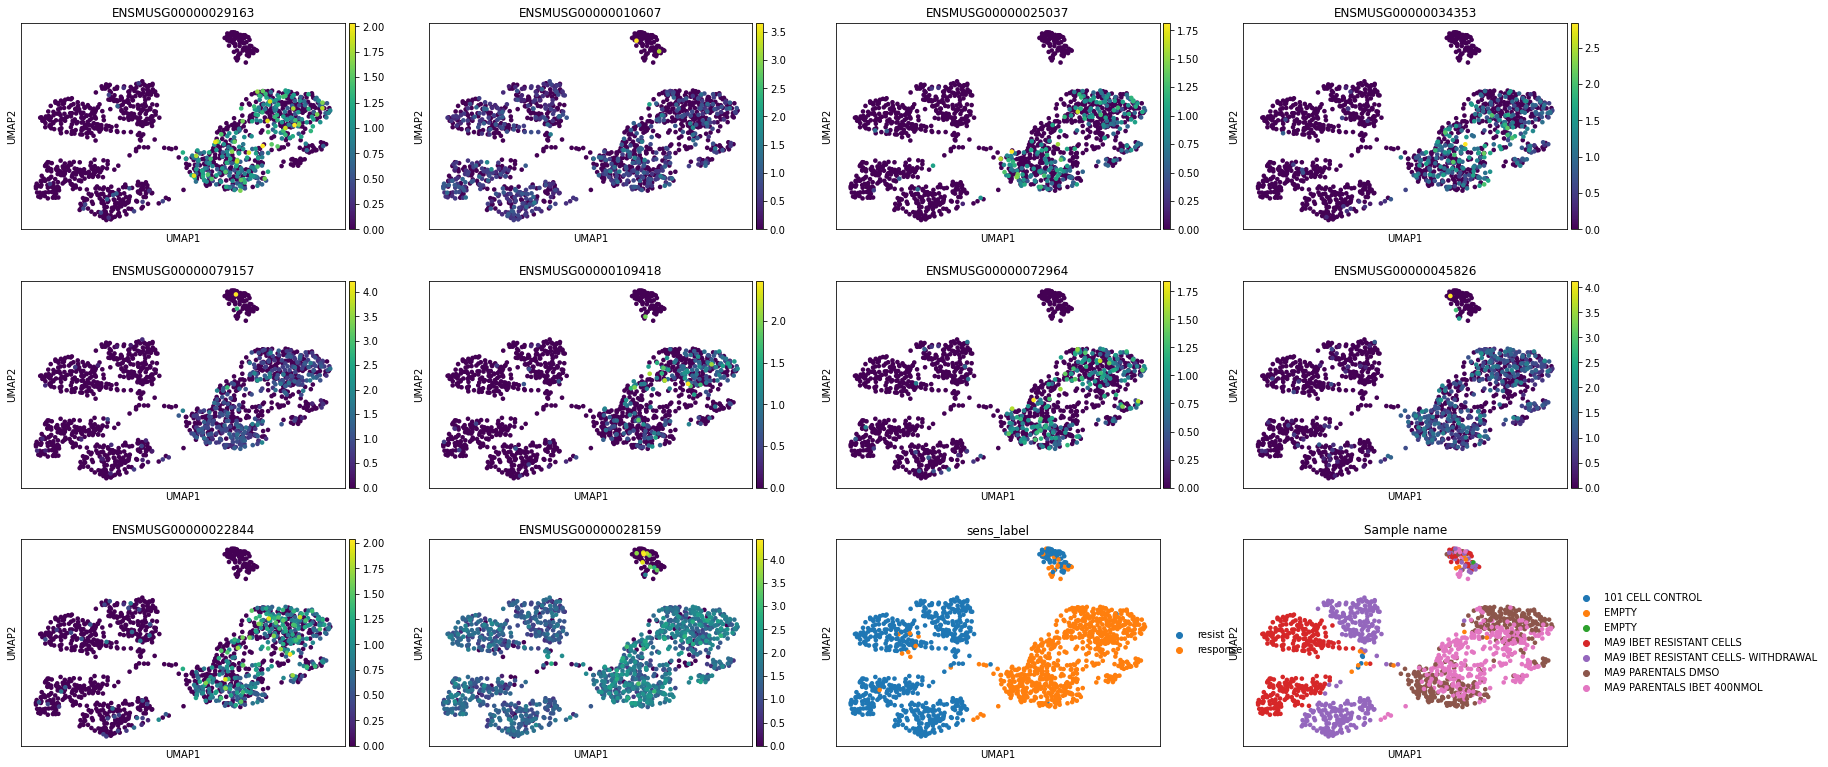

In [38]:
sc.pl.umap(adata,color=list(df_Scg.gene_name.head(10))+["sens_label",get_ct(DATA)])

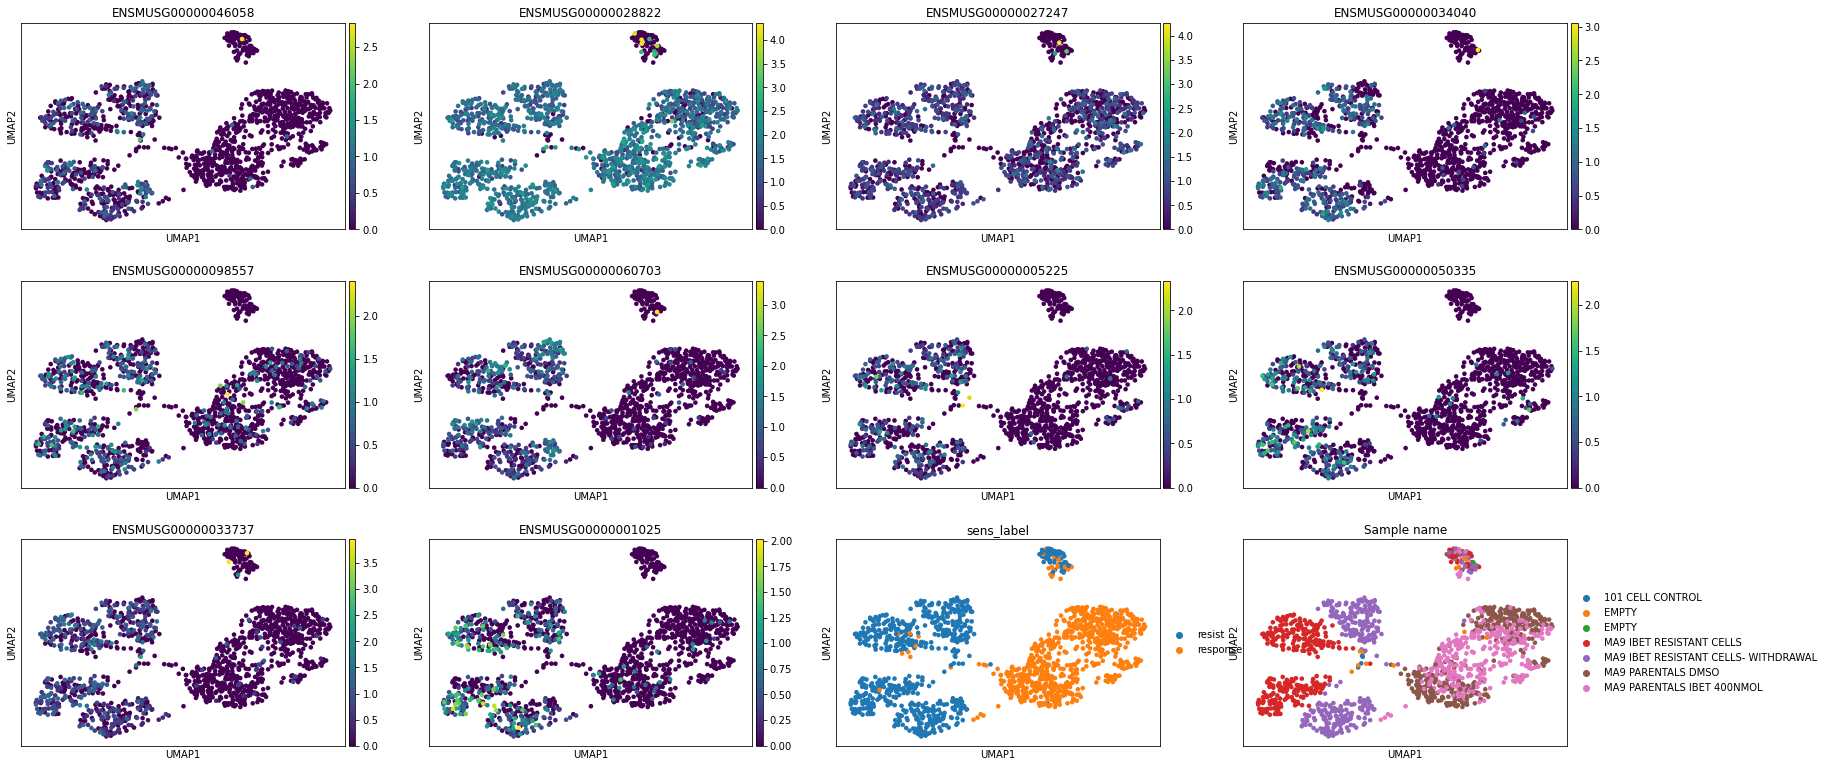

In [39]:
sc.pl.umap(adata,color=list(df_Rcg.gene_name.head(10))+["sens_label",get_ct(DATA)])

# Visualize graident on critical gene

In [40]:
from sklearn.preprocessing import scale

ncgs = 10
gradient_name_s = []
gradient_name_r = []
for i in range(0,ncgs):
    adata.obs[df_Scg.iloc[i,0]+"_gradient"] =igadata[:,df_Scg.iloc[i,0]].X
    gradient_name_s.append(df_Scg.iloc[i,0]+"_gradient")
    
for i in reversed(range(-1*(ncgs),0)):
    adata.obs[df_Scg.iloc[i,0]+"_gradient"] =igadata[:,df_Scg.iloc[i,0]].X
    gradient_name_r.append(df_Scg.iloc[i,0]+"_gradient")

In [41]:
gradient_name_s

['ENSMUSG00000029163_gradient',
 'ENSMUSG00000010607_gradient',
 'ENSMUSG00000025037_gradient',
 'ENSMUSG00000034353_gradient',
 'ENSMUSG00000079157_gradient',
 'ENSMUSG00000109418_gradient',
 'ENSMUSG00000072964_gradient',
 'ENSMUSG00000045826_gradient',
 'ENSMUSG00000022844_gradient',
 'ENSMUSG00000028159_gradient']

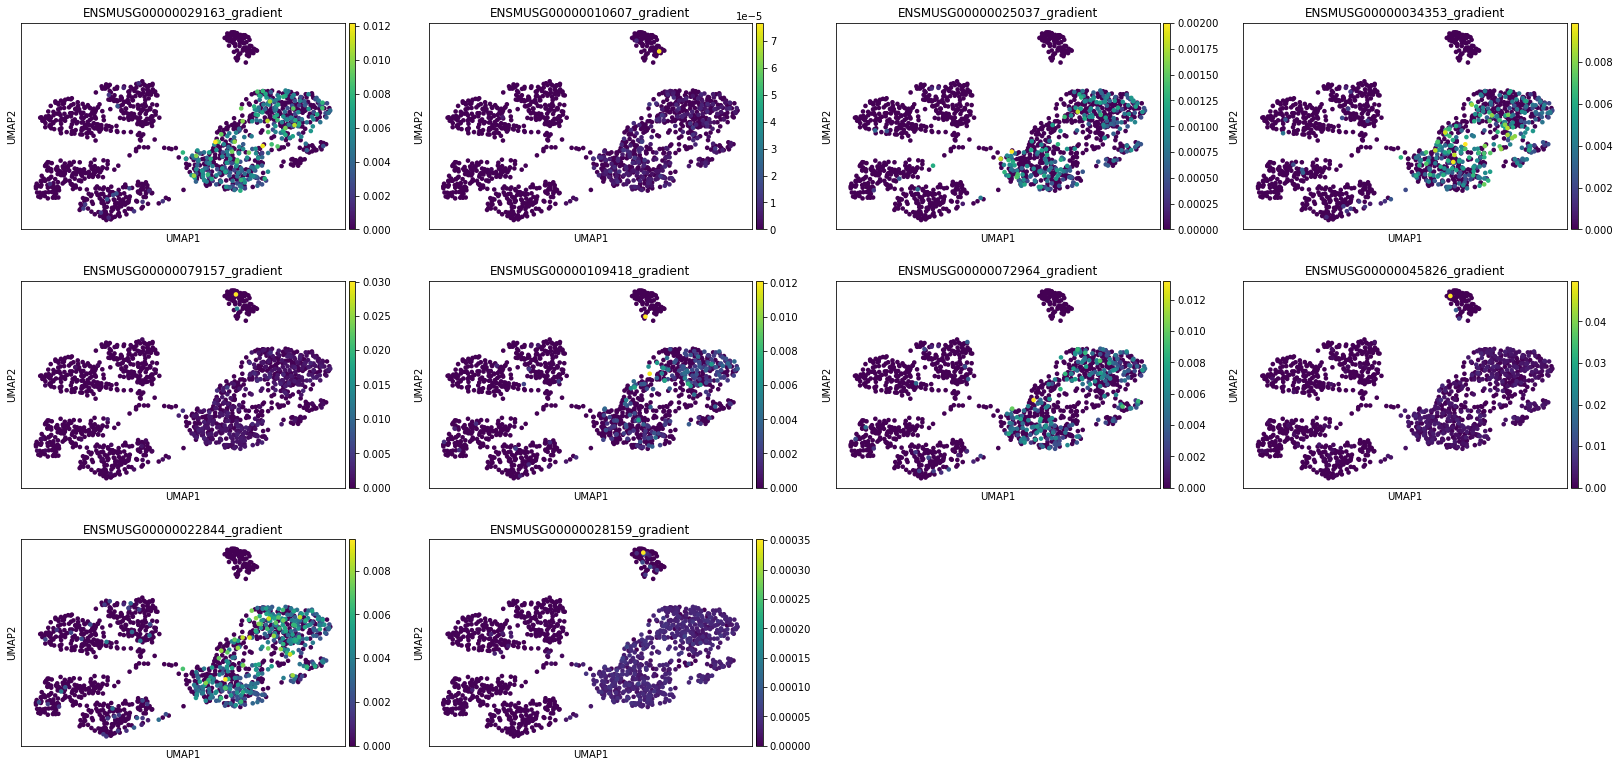

In [42]:
sc.pl.umap(adata,color=gradient_name_s)

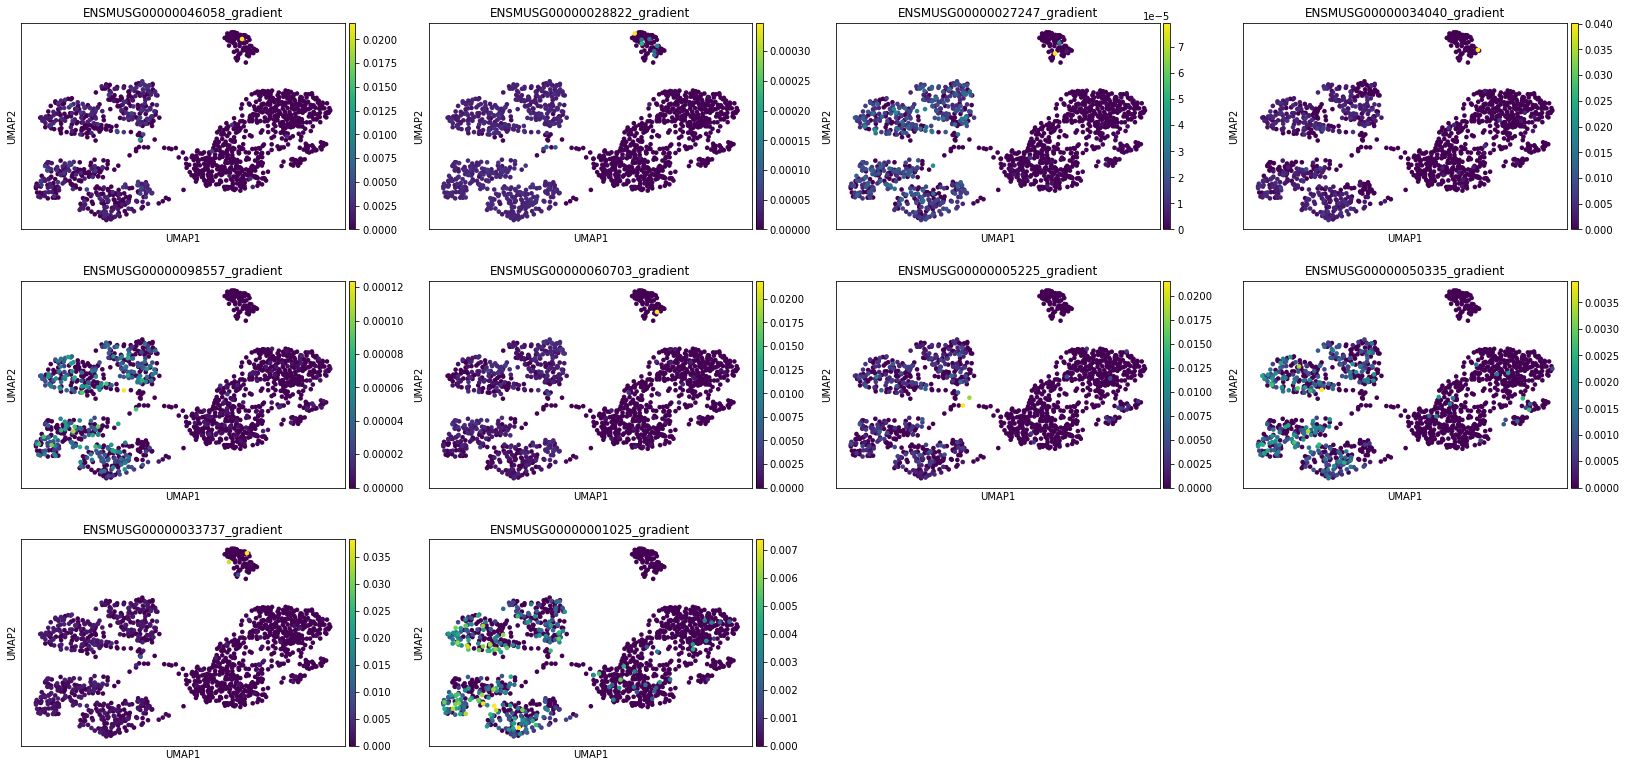

In [43]:
sc.pl.umap(adata,color=gradient_name_r)

In [44]:
df_Rcg.iloc[4,0]

'ENSMUSG00000098557'

In [45]:
df_Rcg.head(10)

gene_name    log_fc     zscore          p_adj  pct_exp_rest  \
26  ENSMUSG00000046058  5.207195  14.621176   9.753903e-41      0.374819   
0   ENSMUSG00000028822  4.967688  34.381969  1.029004e-154      0.895803   
2   ENSMUSG00000027247  4.941399  24.778299   6.300396e-96      0.587554   
11  ENSMUSG00000034040  4.124121  18.156080   1.281476e-59      0.523878   
16  ENSMUSG00000098557  4.094468  16.457712   6.339481e-50      0.370478   
12  ENSMUSG00000060703  3.958952  17.773657   2.241776e-57      0.547033   
31  ENSMUSG00000005225  3.891186  13.602711   3.701558e-36      0.342981   
17  ENSMUSG00000050335  3.840388  16.205421   1.533222e-49      0.393632   
41  ENSMUSG00000033737  3.781262  11.830843   5.481427e-28      0.515195   
24  ENSMUSG00000001025  3.179600  14.767056   3.061093e-42      0.383502   

    pct_exp_ct_sens  
26         0.008242  
0          0.858516  
2          0.468407  
11         0.030220  
16         0.126374  
12         0.041209  
31         0.020604  
17         0.023352  
41         0.042582  
24         0.043956

In [46]:
df_Rcg.loc[
  (df_Rcg.log_fc > 0.25) &
    (df_Rcg.p_adj < 0.05) , "gene_name"
].to_csv("results/"+DATA+"_r.csv",header=False, index=False)

df_Scg.loc[
  (df_Scg.log_fc > 0.25) &
    (df_Scg.p_adj < 0.05) , "gene_name"
].to_csv("results/"+DATA+"_s.csv",header=False, index=False)

df_Rcg.to_csv("results/R"+DATA+str(PCT_EXP)+str(ORDER)+".csv")
df_Scg.to_csv("results/S"+DATA+str(PCT_EXP)+str(ORDER)+".csv")


df_FRcg = df_Rcg.loc[
  (df_Rcg.log_fc > 0.25) &
    (df_Rcg.p_adj < 0.05) , :
]
df_FScg = df_Scg.loc[
  (df_Scg.log_fc > 0.25) &
    (df_Scg.p_adj < 0.05) , :
]


# Plot the regplot between CG and expressions

In [76]:
sgname = []
sgr = []
sgp = []

rgname = []
rgr = []
rgp = []

for i in range(0,10):
    
    g_name = df_FScg.iloc[i,0]
    
    ig = igadata[:,g_name].X
    exp = adata[:,g_name].X

    flagnz_ig = ig != 0
    flagnz_exp = exp != 0

    score_1 = ig[flagnz_ig & flagnz_exp]
    score_2 = exp[flagnz_ig & flagnz_exp]

    r, p = sp.stats.pearsonr(score_1, score_2)

    line_kws={'label':"r2={0:.2f}, pval={1:.1E}".format(r,p)}

    ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws)
    ax.legend()

    sns.despine(left=True)

    plt.savefig("results/r_plots/S_"+str(i)+DATA+g_name+".svg")
    plt.clf()
    
    sgname.append(g_name)
    sgr.append(r)
    sgp.append(p)

    
for i in range(0,10):
    
    g_name = df_FRcg.iloc[i,0]
    
    ig = igadata[:,g_name].X
    exp = adata[:,g_name].X

    flagnz_ig = ig != 0

    flagnz_exp = exp != 0

    score_1 = ig[flagnz_ig & flagnz_exp]
    score_2 = exp[flagnz_ig & flagnz_exp]

    r, p = sp.stats.pearsonr(score_1, score_2)

    line_kws={'label':"r2={0:.2f}, pval={1:.1E}".format(r,p)}

    ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws)
    ax.legend()

    sns.despine(left=True)

    plt.savefig("results/r_plots/R_"+str(i)+DATA+g_name+".svg")
    plt.clf()
    
    rgname.append(g_name)
    rgr.append(r)
    rgp.append(p)

Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


<Figure size 432x288 with 0 Axes>

In [48]:
len(sgname)

10

In [49]:
df_sresult = pd.DataFrame({"gene":sgname,"r":sgr,"p":sgp})
df_sresult['type'] = "response"
df_rresult = pd.DataFrame({"gene":rgname,"r":rgr,"p":rgp})
df_rresult['type'] = "resist"
df_sresult.append(df_rresult).to_csv("results/Regplot"+DATA+str(PCT_EXP)+str(ORDER)+".csv")

In [61]:
adata.obs.sensitivity

RPI1_A3     Resistant
RPI1_A4     Resistant
RPI1_A5     Resistant
RPI1_A6     Resistant
RPI1_A7     Resistant
              ...    
RPI7_P18    Resistant
RPI7_P19    Resistant
RPI7_P20    Resistant
RPI7_P21    Sensitive
RPI7_P22    Resistant
Name: sensitivity, Length: 1419, dtype: category
Categories (2, object): ['Resistant', 'Sensitive']

In [66]:
ig.shape

(1419, 1)

In [69]:
adata.obs.sensitivity.loc[flagnz_ig & flagnz_exp]

RPI1_E2     Sensitive
RPI1_E8     Sensitive
RPI1_E15    Sensitive
RPI1_E16    Sensitive
RPI1_E18    Sensitive
              ...    
RPI7_L3     Sensitive
RPI7_L18    Sensitive
RPI7_L19    Sensitive
RPI7_N18    Resistant
RPI7_N22    Resistant
Name: sensitivity, Length: 206, dtype: category
Categories (2, object): ['Resistant', 'Sensitive']

In [74]:
score_1.shape

(206,)

In [75]:
adata.obs.sensitivity.loc[flagnz_ig & flagnz_exp].shape

(206,)

IndexError: tuple index out of range

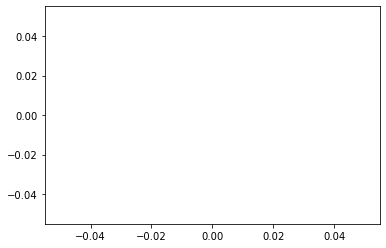

In [72]:
    g_name = df_FScg.iloc[2,0]
    
    ig = igadata[:,g_name].X
    exp = adata[:,g_name].X

    flagnz_ig = ig != 0
    flagnz_exp = exp != 0

    score_1 = ig[flagnz_ig & flagnz_exp]
    score_2 = exp[flagnz_ig & flagnz_exp]

    r, p = sp.stats.pearsonr(score_1, score_2)

    line_kws={'label':"r2={0:.2f}, pval={1:.1E}".format(r,p)}
    scatter_kws = {'color':adata.obs.sensitivity.loc[flagnz_ig & flagnz_exp]}

    ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws,scatter_kws=scatter_kws)
    ax.legend()

    sns.despine(left=True)